### Antecedentes

Este cuaderno incluye un ejercicio de ejemplo para observar como la cantidad de datos afecta el histograma hecho a partir de esos datos. Este ejercicio consiste en una parte teórica y una parte práctica.

# Ejemplo: Histograma de Masa Invariante

En este ejercicio se introduce el detector CMS (Compact Muon Solenoid) y el concepto de masa invariante. Con datos reales provenientes del detector CMS se observa como un histograma es afectado por la cantidad de datos que contiene. 

### Detector CMS

En CERN, partículas son aceleradas y colisionan en el LHC (Gran Colisionador de Hadrones: Large Hadron Collider). Con el detector CMS las particulas creadas en estas colisiones pueden ser observadas y medidas. En la imagen abajo se muestra el detector CMS abierto. 

<img src="../Imagenes/CMS_avattu.jpg" alt="CMS-ilmaisin avattuna" style="height: 400px">

(Imagen: Domenico Salvagnin, https://commons.wikimedia.org/wiki/File:CMS@CERN.jpg)
<br>
<br>
<br>

### Masa Invariante

La masa invariante $M$ es un valor que puede ser calculado de los resultados de las mediciones del detector CMS. La masa invariante es un concepto matemático, no una masa física. 

Por ejemplo, tomemos la situación donde una partícula A decae en dos partículas B y C. La masa invariante de las dos partículas B y C está determinada por la ecuación:

$$ M = \sqrt{(E_1 + E_2)^2-(\vec{p_1} + \vec{p_2})^2}, $$

donde $E_1$ y $E_2$ son las energías de los productos del decaimiento y $\vec{p_1}$ y $\vec{p_2}$ los momentos lineales respectivos. 

La masa invariante puede ser utilizada para examinar la existencia de una partícula A. Si las partículas B y C aparecen del decaimiento de una partícula A, entonces la masa invariante de ellas equivale a la masa física de la partícula A. Si las partículas B y C aparecen de otro proceso que no sea el decaimiento de A (hay una cantidad enorme de procesos en las colisiones de partículas), entonces la masa invariante de B y C es alguna otra cosa. 

Determiando la energía y el momento lineal de B y c su masa invariante puede ser calculada. Esto se hace a grandes cantidades de particulas. Haciendo esto puede demostrarse la existencia de una particula A. 

En este ejercicio los valores de las masas invariantes ya están calculados.

### ¡Probemos!

Empecemos observando los datos reales recolectados por el detector CMS. Nos concentraremos en el decaimiento del boson Z a dos muones (muón y anti-muón).

Utilizarameos los datos recolectados en 2011 [1]. De la base de datos primaria 10851 eventos de colisión en los cuales ha habido exactamente dos muones han sido seleccionados hacia el archivo "Zmumu_Run2011A_masses.csv". (la selección ha sido realizada con un programa que está disponible libremente en https://github.com/tpmccauley/dimuon-filter.)

El archivo incluye valores calculados de la masa invariante de dos muones para los 10851 eventos. Un histograma es una gran herramienta para observar los valores. El histograma representa cuantos valores de $M$ han habido en un cierto rango de valores.

En este ejercicio nuestra misión es examinar __como la cantidad de datos utilizados afecta al histograma hecho a partir de esos datos.__
<br>
<br>
<br>
[1]  CMS collaboration (2016). DoubleMu primary dataset in AOD format from RunA of 2011 (/DoubleMu/Run2011A-12Oct2013-v1/AOD). CERN Open Data Portal. DOI: [10.7483/OPENDATA.CMS.RZ34.QR6N](http://doi.org/10.7483/OPENDATA.CMS.RZ34.QR6N).

### 1) Obteniendo el archivo y las masas

Empecemos con el código donde los módulos necesarios de Python son importados y el archivo de datos es obtenido. Explore los comentarios en el código y ejecute el código dando clic sobre la casilla y presionando _Ctrl_ + _Enter_. Después de eso puede avanzar a la parte dos. Puede que obtenga una advertencia relacionada al módulo _matplotlib_ pero no es necesario preocuparse por eso. 

In [7]:
# Importar todos los módulos necesarios. Pandas es para análisis de datos, numpy es para cálculos científicos
# y matplotlib.pyplot es para hacer gráficas. Los módulos son llamados pd, np y plt.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crear una nueva estructura de marco de datos desde el archivo "Zmumu_Run2011A_masses.csv"
dataset = pd.read_csv('../Datos/Zmumu_Run2011A.csv')

# Crear una estructura de serie (básicamente una lista) y nombrarla "masa_invariante".
# Guardar la columna "M" desde "dataset" hacia la variable "masa_invariante".
masa_invariante = masa_invariante = np.sqrt(2*dataset.pt1*dataset.pt2*(np.cosh(dataset.eta1-dataset.eta2) - np.cos(dataset.phi1-dataset.phi2)))

# Crear una lista vacia "selección", donde la cantidad de datos seleccionados de la masa invariante van a ser guardados. 
seleccion = []

### Seleccionando la cantidad de datos

El código abajo pregunta cuantos eventos van a ser seleccionados para el histograma. Después de eso el código grafica el histograma con las masas invariantes seleccionadas. 

Ejecutar el código dando clic en la casilla de código activa y presionando _Ctrl_ + _Enter_. Puede ejecutar el código de nuevo con un número diferente de datos presionando _Ctrl_ + _Enter_ de nuevo.

Examinar como la cantidad de datos utilizados afecta el histograma. ¿Qué valores de la masa invariante paracen aparecer con más frecuencia?, ¿qué puede concluirse sobre esos valores?

Examinando el código prediga que sucedería si ingresa un número mayor a 10851 cuando se le pregunta por la cantidad de datos. Pruebe su predicción ejecutando el código. 

Ingrese el numero de eventos requerido: 1000

 Seleccionó 1000 valores de masa invariante de todos los datos.


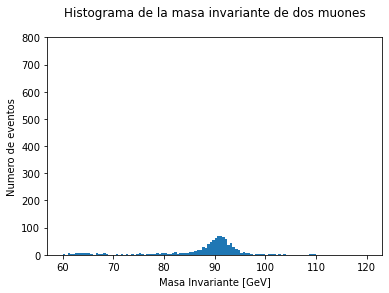

In [9]:
# Preguntar al usuario el número de eventos requerido. Salvar el número a la variable "cantidad".
cantidad = int(input('Ingrese el numero de eventos requerido: '))

# Revisar si el usuario ha seleccionado más eventos de los que están disponibles.
# Si no seleccionar el número de masas invariantes de la variable "masa_invariante".
# Las masas van a ser seleccionadas en orden. 
if cantidad > 10851:
    print('''Ha intentado seleccionar más datos de los que están contenidos en el archivo.
El histograma no pudo ser dibujado. La cantidad máxima de datos es 10851.''')
else:
    for f in range(cantidad):
        M = masa_invariante[f]
        seleccion.append(M)
    print('\n Seleccionó {} valores de masa invariante de todos los datos.'.format(cantidad))

# Jupyter Notebook utiliza "funciones mágicas". Con esta función es posible gráficar
# directamente en el cuaderno. 
%matplotlib inline

# Crear el histograma a partir de los datos en la variable "seleccion". Establecer el rango y número de casillas.
plt.hist(seleccion, bins=120, range=(60,120))

# Establecer el eje y de 0 a 800.
axes = plt.gca()
axes.set_ylim([0,800])

# Nombrar los ejes y darles un título.
plt.xlabel('Masa Invariante [GeV]')
plt.ylabel('Numero de eventos')
plt.title('Histograma de la masa invariante de dos muones\n')

# Vaciar la variable "seleccion" para la próxima ejecución. 
selected = []

### 3) Evolución del histograma cuando el número de datos aumenta

Observemos con series de imágenes cómo el histograma cambiará cuando la cantidad de datos aumenta.

El código abajo creará 11 diferentes histogramas de la masa invariante a partir de los mismos datos. Entre cada imagen 1000 valores más de masas invariantes se añadirán al histograma. Ejecute el código dando clic en la casilla activa y luego presionando _Ctrl_ + _Enter_. Observe las imágenes y explique lo que ve. 

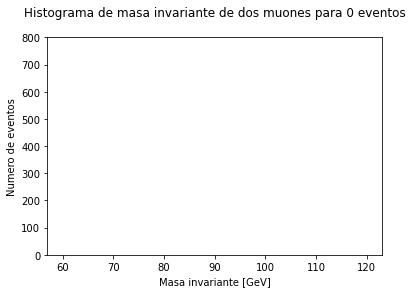

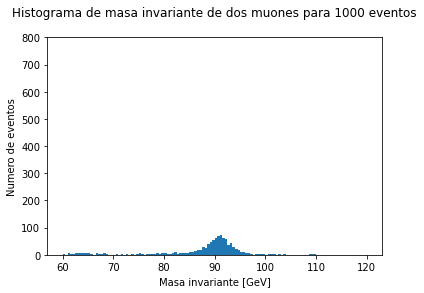

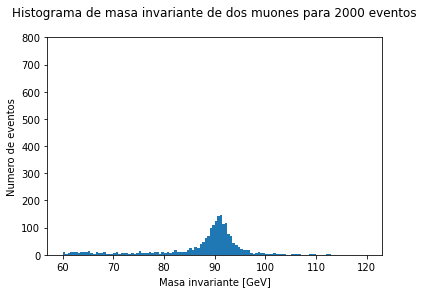

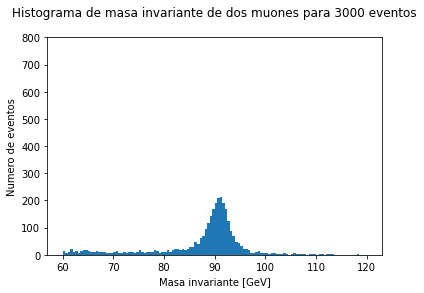

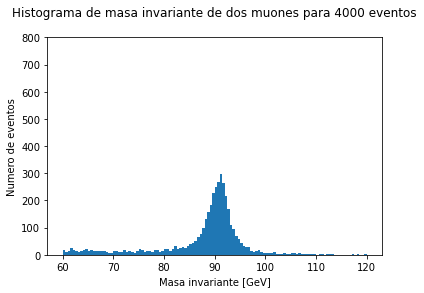

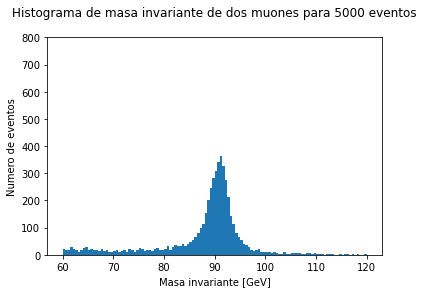

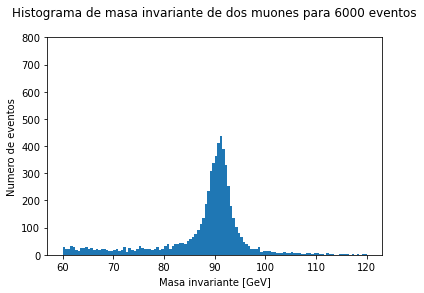

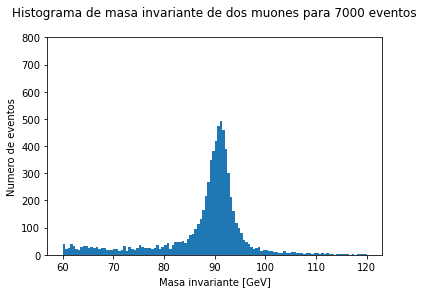

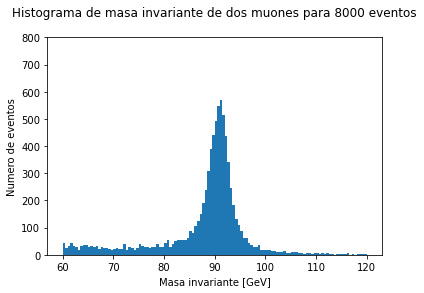

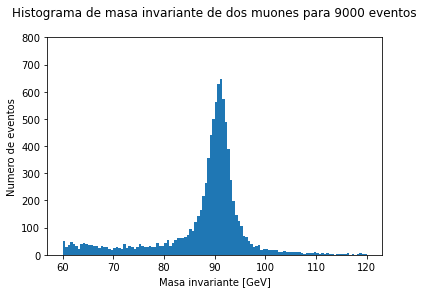

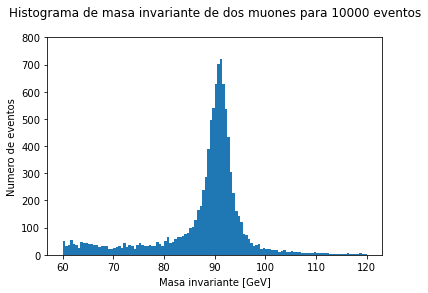

In [5]:
# Bucle donde un histograma es graficado después de 1000 eventos hasta que 10000 eventos han sido alcanzados.
for a in range(0,10851,1000):
    T = masa_invariante[0:a]
    
    %matplotlib inline
    plt.hist(T, bins=120, range=(60,120))
    
    # Establezca el eje y de 0 a 800. 
    axes = plt.gca()
    axes.set_ylim([0,800])
    
    plt.xlabel('Masa invariante [GeV]')
    plt.ylabel('Numero de eventos')
    plt.title('Histograma de masa invariante de dos muones para {} eventos\n'.format(len(T)))
    plt.show()